In [55]:
import math
import h5py
from sphviewer.tools import QuickView, cmaps
import sys
sys.path.insert(0, "/hdfs/local/joosep/gaia")
sys.path.insert(0, "/usr/local/")
import gizmo_read
import matplotlib.pyplot as plt
import numpy as np


from matplotlib import rc
rc('font', family='times new roman', size=22.)
rc('text', usetex=False)

from astropy.constants import G, M_sun
import astropy.units as u

# filepath for input data
input_datadir = "/hdfs/local/joosep/gaia/latte_simulation_snapshots"

In [56]:

# check permissions of data files
!ls -al /hdfs/local/joosep/gaia/latte_simulation_snapshots/m12f/snapdir_600

total 9458762
drwxr-xr-x. 6 1000006 HEPUsers       4096 Oct 12 11:54 .
drwxr-xr-x. 5 1000006 HEPUsers       4096 Feb 19 14:54 ..
-rw-r-----. 1 1000006 HEPUsers 2132747007 Oct 12 11:53 snapshot_600.0.hdf5
-rw-r-----. 1 1000006 HEPUsers 2460753960 Oct 12 11:54 snapshot_600.1.hdf5
-rw-r-----. 1 1000006 HEPUsers 2602953780 Oct 12 11:54 snapshot_600.2.hdf5
-rw-r-----. 1 1000006 HEPUsers 2489309981 Oct 12 11:54 snapshot_600.3.hdf5


We are going to visualize the m12f galaxy. For this purpose, we need to first load the results of the simulation using the [`gizmo_read` python package](https://bitbucket.org/awetzel/gizmo_read/src/master/). 

The output of the simulation are stored in four hdf5 files which contains a list of different particles (e.g. stellar, gas and DM particles). In the following we load and further visualize only the DM particles.

In [57]:
filepath = input_datadir + "/m12f/"
part = gizmo_read.read.Read.read_snapshot(species="dark", directory=filepath)

reading header from:
  hdfs/local/joosep/gaia/latte_simulation_snapshots/m12f/snapdir_600/snapshot_600.0.hdf5

snapshot contains the following number of particles:
  dark   (id = 1): 96239056 particles

reading dark properties:
  ['id', 'mass', 'position', 'potential', 'velocity']

reading particles from:
  snapshot_600.0.hdf5
  snapshot_600.1.hdf5
  snapshot_600.2.hdf5
  snapshot_600.3.hdf5

reading galaxy center coordinates and principal axes from:  hdfs/local/joosep/gaia/latte_simulation_snapshots/m12f/m12f_res7100_center.txt
  center position [kpc] = 38711.761, 47665.072, 46817.265
  center velocity [km/s] = -154.5, 160.9, 106.8

adjusting particle coordinates to be relative to galaxy center
  and aligned with the principal axes



In [58]:
pdrk = part["dark"]["position"]
# The following commands select a subsample of particles. In this way, the notebook runs faster
#random_sample = np.random.permutation(pdrk.shape[0])[:1000000] 
#pdrk = pdrk[random_sample]

We are going to visualize the simulations using [Py-SPHViewer](http://alejandrobll.github.io/py-sphviewer/)

In [59]:
# this will take some time to run!
qv = QuickView(pdrk, r='infinity', 
               x=0, y=0, z=0,
               plot=False)
# r='infinity' -> camera is looking at the scene from the infinity, so the scene
# has to be rendered using a parallel (or orthographic) projection
# x=0, y=0, z=0 -> camera should point to that point of the space

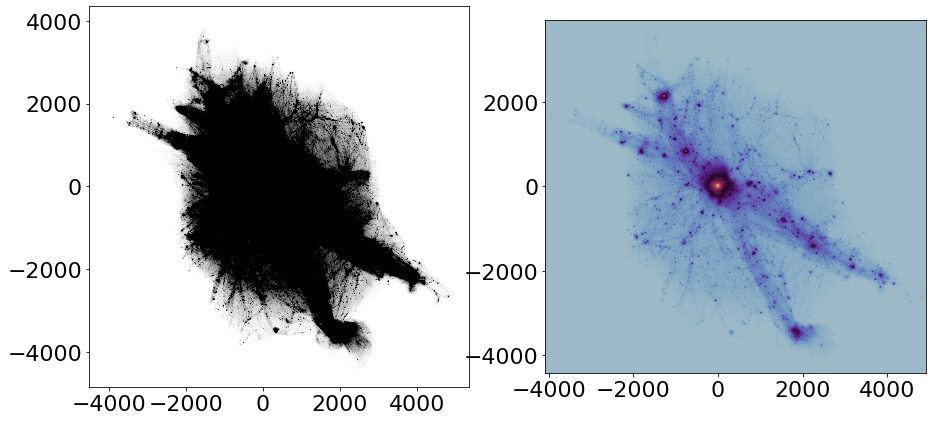

In [60]:
fig = plt.figure(1, figsize=(15,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(pdrk[:,0], pdrk[:,1], 'k.', ms=0.1, alpha=0.03)
ax2.imshow(qv.get_image(), extent=qv.get_extent(),
           origin='lower', cmap=cmaps.twilight(), 
           vmin=-0.5) # projected density field of the distribution of DM particles
# qv.get_extent() returns the actual physical extent of the image. 
# If not used, matplotlib will just print the number of pixels of the image
#ax1.set_xlim([-4000, 4000]), ax1.set_ylim([-4000, 3000])
#ax2.set_xlim([-4000, 4000]), ax2.set_ylim([-4000, 3000])

DM halos are self-gravitating, virialized objecs whose structure is governed by collisionless dynamics. There is no unique convention to define the DM halo mass. In this work, we define the total or virial mass of a DM halo as the mass of DM enclosed within a sphere which has an average density 200 times the critical density of the Universe, i.e.:
\begin{equation}
M_{total} = M_{200} = \frac{4}{3}\pi R_{200} \Delta \rho_{crit},
\end{equation}
with $R_{200}$ the size of the halo, $\Delta=200$ and $\rho_{crit}$ the critical density of the Universe. 

(Whether there is a clear definition of DM halo, a precise definition of a DM subhalo does not exist!)


**Some important scales:**

The halo of the Milky Way has the following characteristics:

- $R_{200}\sim200\,\rm kpc$
- $M_{200}\sim10^{12}\,\rm M_{\odot}$

On the other hand, the stellar disk of the Milky Way has a radius of $\sim 15\,\rm kpc$, and the baryonic content of our Galaxy is $\sim 7\times 10^{10}\,\rm M_{\odot}$.

([This](https://arxiv.org/abs/1602.07702) is a very nice review on the Milky Way)

In [61]:
hsml = qv.get_hsml() # array containing the smoothing lengths of the SPH particles. QuiekView took so much time
# in order to calculate this!

# zooming in
qv_halo = QuickView(pdrk, hsml=hsml, r='infinity', plot=False, x=0,y=0,z=0, extent=[-300, 300, -300, 300])

In [62]:
# further zooming in
qv_halo_zoom = QuickView(pdrk, hsml=hsml, r='infinity', plot=False, x=0,y=0,z=0, extent=[-100, 100, -100, 100])

(-300.0, 300.0)

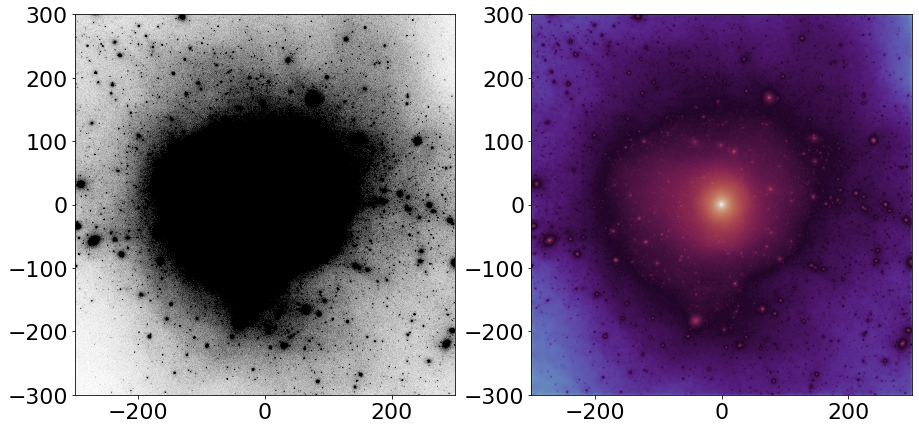

In [63]:
fig = plt.figure(1, figsize=(15,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(pdrk[:,0], pdrk[:,1], 'k.', ms=0.1, alpha=0.03)
ax2.imshow(qv_halo.get_image(), extent=qv_halo.get_extent(),
           origin='lower', cmap=cmaps.twilight(), 
           vmin=-0.5) # projected density field of the distribution of DM particles
# qv.get_extent() returns the actual physical extent of the image. 
# If not used, matplotlib will just print the number of pixels of the image
ax1.set_ylim([-300, 300])
ax1.set_xlim([-300, 300])

(-100.0, 100.0)

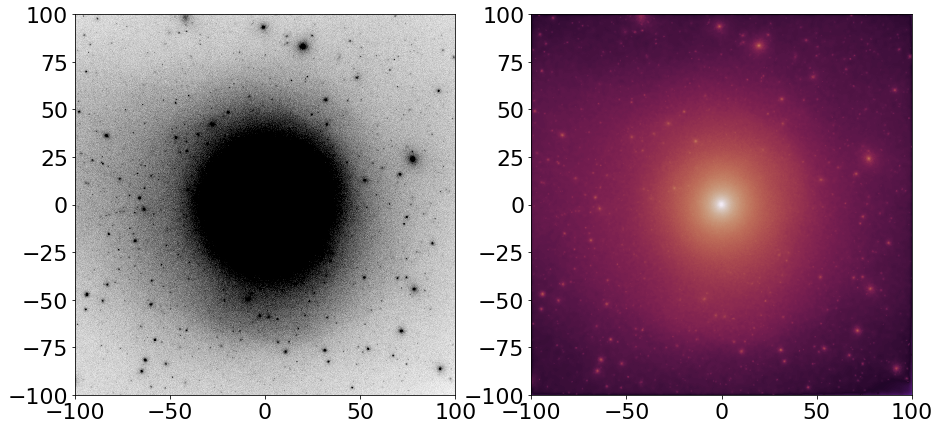

In [64]:
fig = plt.figure(1, figsize=(15,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(pdrk[:,0], pdrk[:,1], 'k.', ms=0.1, alpha=0.03)
ax2.imshow(qv_halo_zoom.get_image(), extent=qv_halo_zoom.get_extent(),
           origin='lower', cmap=cmaps.twilight(), 
           vmin=-0.5) # projected density field of the distribution of DM particles
# qv.get_extent() returns the actual physical extent of the image. 
# If not used, matplotlib will just print the number of pixels of the image
ax1.set_ylim([-100, 100])
ax1.set_xlim([-100, 100])

## Investigate DM halos found with `AHF`

The output of the simulation is simply a list of particles. Therefore, we need to post-process the output files to find over-densities of particles that can be considered DM halos or subhalos. We are going to do this using the [Amiga Halo Finder](http://popia.ft.uam.es/AHF/Documentation.html).

Later on, you will need to run the AHF code to find the corresponding subhalos in the m12f galaxy. Before that, let's play a little with one example output of the AHF code.

In [65]:
!cat /hdfs/local/joosep/gaia/latte_simulation_snapshots/m12f/m12f_res7100_center.txt

# m12f_res7100
# center position(x, y, z) [kpc]
38711.76113, 47665.07165, 46817.26477
# center velocity(v_x, v_y, v_z) [km/s]
-154.47322, 160.85855, 106.82710
# principal axes rotation vectors
# defined via star particles with r < 8.2 kpc, age = [0.0, 1.0] Gyr
-0.464385978922, 0.291482979130, 0.836291417784
0.708714933465, -0.443966939801, 0.548285053095
0.531101502223, 0.847308107622, -0.000406318212


In [516]:
# Load output example of AHF

filepath = "/home/abdullahbazarov1/"
#filepath = "/scratch-persistent/gaia/m12f/ahf/"
halos    = np.genfromtxt(filepath + "m12f-v2.z0.000.AHF_halos", unpack=True)
# hubble parameter @ z=0
h        = 0.702
# center ML-like halo (taken from m12f_res7100_center.txt)
center_x = 38711.761 # kpc
center_y = 47665.072 # kpc
center_z = 46817.265 # kpc

id_halos = halos[0]
id_host  = halos[1]
Nsb      = halos[2] # number of substructures
Mvir     = halos[3]/h # total or virial mass of DM (sub)halos
Np       = halos[4] # number of particles contained within a (sub)halos
# (x_halos, y_halos, z_halos) are center of DM (sub)halos found by AHF
x_halos  = halos[5]/h-center_x
y_halos  = halos[6]/h-center_y
z_halos  = halos[7]/h-center_z
Vmax     = halos[16]

In [517]:
# principal axes rotation vectors (taken from m12f_res7100_center.txt)
rotation_vectors = np.asarray([[-0.464385978922, 0.291482979130, 0.836291417784], 
                               [0.708714933465, -0.443966939801, 0.548285053095], 
                               [0.531101502223, 0.847308107622, -0.000406318212]])

coordinate_vectors = np.transpose(np.asarray([x_halos, y_halos, z_halos]))

coordinate_vectors_rot = np.asarray( np.dot(coordinate_vectors, rotation_vectors.transpose()), 
                                    dtype=coordinate_vectors.dtype)

x_halos = coordinate_vectors_rot[:, 0]
y_halos = coordinate_vectors_rot[:, 1]
z_halos = coordinate_vectors_rot[:, 2]
r_halos  = np.sqrt(np.power(x_halos, 2) + np.power(y_halos, 2) + np.power(z_halos, 2))


(-4000.0, 4000.0)

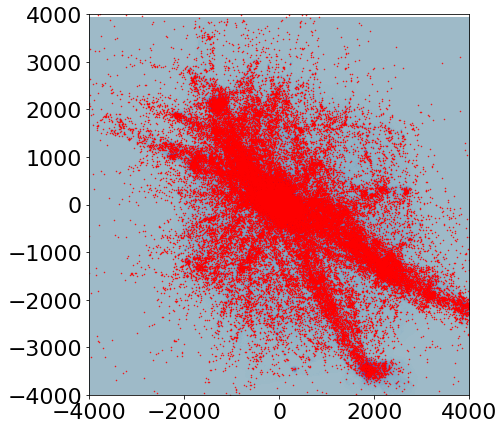

In [518]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(qv.get_image(), extent=qv.get_extent(), origin='lower', cmap=cmaps.twilight(), vmin=-0.5)
ax.scatter(x_halos, y_halos, color="red", s=1, marker=".")
ax.set_xlim([-4000, 4000])
ax.set_ylim([-4000, 4000])

# Each red dot corresponds to the center of a halo found by AHF

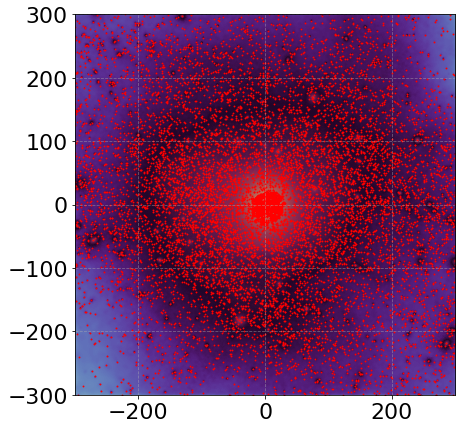

In [519]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.imshow(qv_halo.get_image(), extent=qv_halo.get_extent(), origin='lower', cmap=cmaps.twilight(), vmin=-0.5)
ax.scatter(x_halos, y_halos, color="r", s=3, marker=".")
ax.set_xlim([-300, 300])
ax.set_ylim([-300, 300])
ax.grid(which='both', alpha=0.5, ls="--")

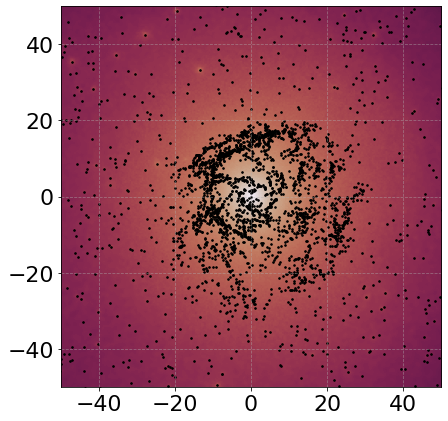

In [520]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
xlim = 50; ylim = 50
ax.imshow(qv_halo_zoom.get_image(), extent=qv_halo_zoom.get_extent(), origin='lower', cmap=cmaps.twilight(), vmin=-0.5)
ax.scatter(x_halos, y_halos, color="k", s=10, marker=".")
ax.set_xlim([-xlim, xlim])
ax.set_ylim([-ylim, ylim])
ax.grid(which='both', alpha=0.5, ls="--")

In the following, we try to understand some statistics of the AHF subhalos (e.g. how many subhalos with a given mass --left panels-- and how many subhalos with a given number of partiles --right panels--)

2232
303
22
0
1740
675
95
22
3
1


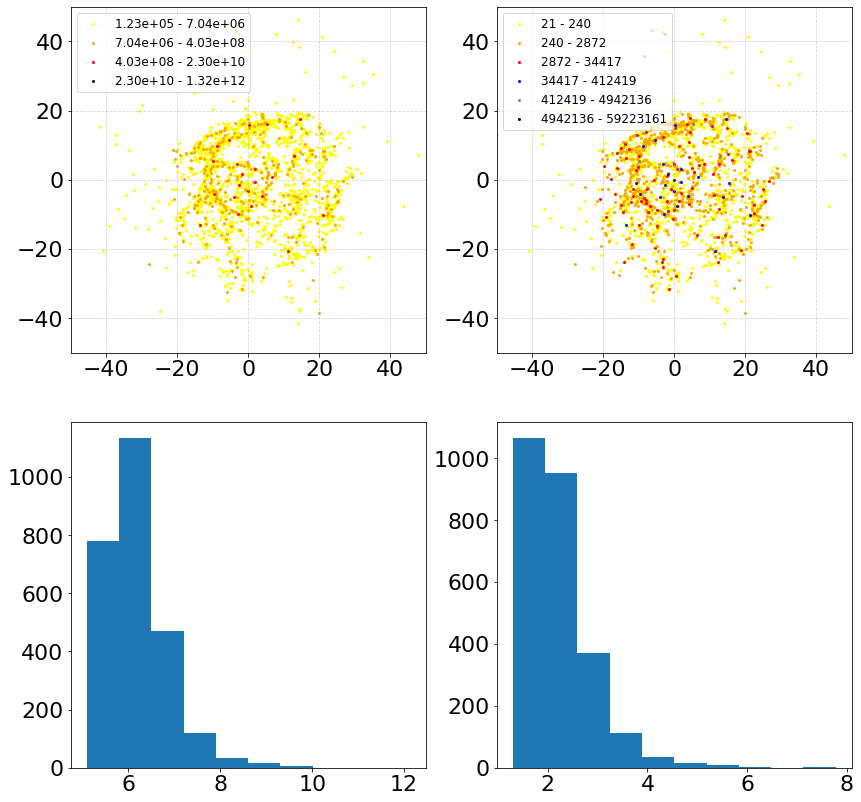

In [521]:
fig, ax = plt.subplots(2, 2, figsize=(14, 14))
xlim = 50; ylim = 50
pos  = np.where(r_halos < xlim) 

bins_mass = np.logspace(np.log10(min(Mvir[pos])), np.log10(max(Mvir[pos])), 5)
colors = ["yellow", "orange", "red", "k"]

for i in range(len(bins_mass)-1):
    pos_2 = np.where((Mvir[pos] > bins_mass[i]) & (Mvir[pos] < bins_mass[i+1]))
    print(len(pos_2[0]))
    ax[0, 0].scatter(x_halos[pos][pos_2], y_halos[pos][pos_2], color=colors[i], s=15, marker=".", 
              label=("%.2e - %.2e" %(bins_mass[i], bins_mass[i+1])))
    
ax[0, 0].set_xlim([-xlim, xlim])
ax[0, 0].set_ylim([-ylim, ylim])
ax[0, 0].grid(which='both', alpha=0.5, ls="--")
ax[0, 0].legend(fontsize=12)

_, _, _ = ax[1, 0].hist(np.log10(Mvir[pos]))

#bins_N = [20, 50, 100, 500, 1000, 5000, max(Np[pos])]
bins_N = np.logspace(np.log10(20), np.log10(max(Np[pos])), 7)
colors = ["yellow", "orange", "red", "blue", "grey", "k"]

for i in range(len(bins_N)-1):
    pos_2 = np.where((Np[pos] > bins_N[i]) & (Np[pos] < bins_N[i+1]))
    print(len(pos_2[0]))
    ax[0, 1].scatter(x_halos[pos][pos_2], y_halos[pos][pos_2], color=colors[i], s=15, marker=".", 
           label=("%i - %i" %(math.ceil(bins_N[i]), math.ceil(bins_N[i+1]))))
    
ax[0, 1].set_xlim([-xlim, xlim])
ax[0, 1].set_ylim([-ylim, ylim])
ax[0, 1].grid(which='both', alpha=0.5, ls="--")
ax[0, 1].legend(fontsize=12)

_, _, _ = ax[1, 1].hist(np.log10(Np[pos]))

388
35
6
0
0
0
23
149
180
77


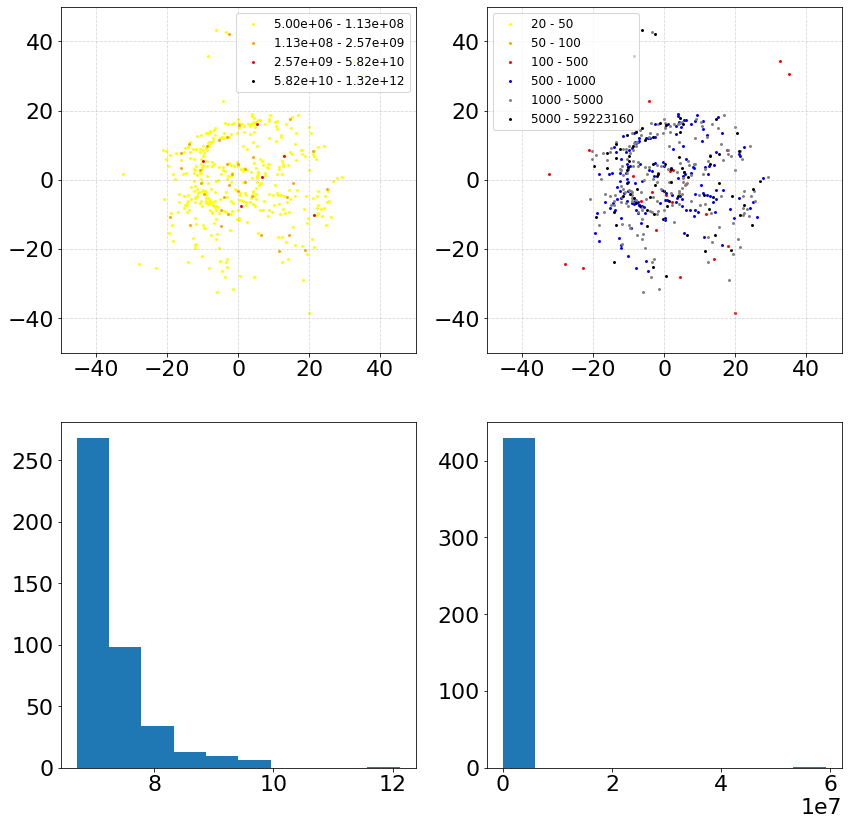

In [522]:
fig, ax = plt.subplots(2, 2, figsize=(14, 14))
xlim = 50; ylim = 50
pos  = np.where((r_halos < xlim) & (Mvir>5e6))

bins_mass = np.logspace(np.log10(5e6), np.log10(max(Mvir[pos])), 5)
colors = ["yellow", "orange", "red", "k"]

for i in range(len(bins_mass)-1):
    pos_2 = np.where((Mvir[pos] > bins_mass[i]) & (Mvir[pos] < bins_mass[i+1]))
    print(len(pos_2[0]))
    ax[0, 0].scatter(x_halos[pos][pos_2], y_halos[pos][pos_2], color=colors[i], s=15, marker=".", 
              label=("%.2e - %.2e" %(bins_mass[i], bins_mass[i+1])))
    
ax[0, 0].set_xlim([-xlim, xlim])
ax[0, 0].set_ylim([-ylim, ylim])
ax[0, 0].grid(which='both', alpha=0.5, ls="--")
ax[0, 0].legend(fontsize=12)

_, _, _ = ax[1, 0].hist(np.log10(Mvir[pos]))

bins_N = [20, 50, 100, 500, 1000, 5000, max(Np[pos])]
colors = ["yellow", "orange", "red", "blue", "grey", "k"]

for i in range(len(bins_N)-1):
    pos_2 = np.where((Np[pos] > bins_N[i]) & (Np[pos] < bins_N[i+1]))
    print(len(pos_2[0]))
    ax[0, 1].scatter(x_halos[pos][pos_2], y_halos[pos][pos_2], color=colors[i], s=15, marker=".", 
           label=("%i - %i" %(bins_N[i], bins_N[i+1])))
    
ax[0, 1].set_xlim([-xlim, xlim])
ax[0, 1].set_ylim([-ylim, ylim])
ax[0, 1].grid(which='both', alpha=0.5, ls="--")
ax[0, 1].legend(fontsize=12)

_, _, _ = ax[1, 1].hist(Np[pos])

We need to check the results of the AHF run with those obtained in [Garrison-Kimmel et al. 2017](https://arxiv.org/abs/1701.03792) (see e.g. table 1 and figure 2)

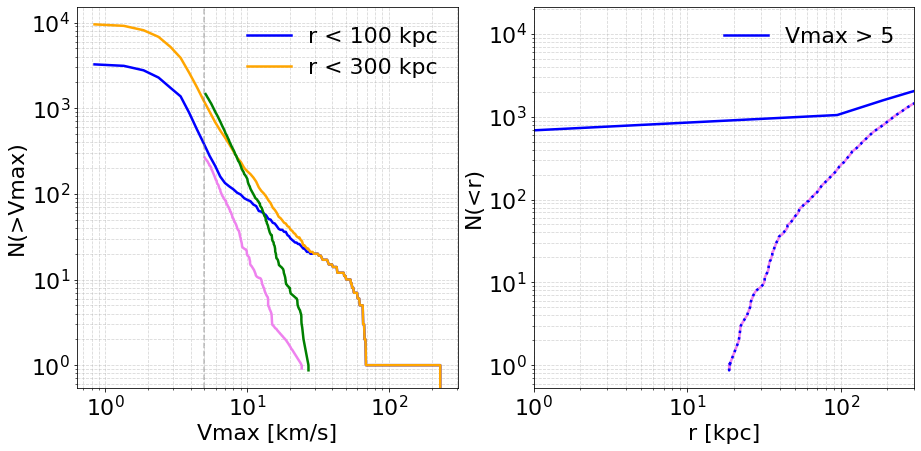

In [523]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

pos = np.where(r_halos < 100.)
values, base = np.histogram(Vmax[pos], bins=450)
cumulative = np.cumsum(values)
ax[0].plot(base[:-1], len(Vmax[pos])-cumulative, c="blue", lw=2.5, label="r < 100 kpc")

pos = np.where(r_halos < 300.)
values, base = np.histogram(Vmax[pos], bins=450)
cumulative = np.cumsum(values)
ax[0].plot(base[:-1], len(Vmax[pos])-cumulative, c="orange", lw=2.5, label="r < 300 kpc")

data = np.genfromtxt("/scratch-persistent/gaia/m12f/rockstar/figure2b_Garrison-kimmel+17_100.dat", unpack=True)
ax[0].plot(data[0], data[1], color="violet", lw=2.5)
# ax[0].plot(data[0], data[1], color="blue", lw=2.5, ls=":")
data = np.genfromtxt("/scratch-persistent/gaia/m12f/rockstar/figure2b_Garrison-kimmel+17_300.dat", unpack=True)
ax[0].plot(data[0], data[1], color="green", lw=2.5)
# ax[0].plot(data[0], data[1], color="orange", lw=2.5, ls=":")

ax[0].axvline(5, ls="--", color="grey", alpha=0.5)
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].set_xlabel("Vmax [km/s]")
ax[0].set_ylabel("N(>Vmax)")
ax[0].legend(frameon=False)
ax[0].grid(which="both", ls="--", alpha=0.5)

pos = np.where(Vmax > 5.)
values, base = np.histogram(r_halos[pos], bins=800)
cumulative = np.cumsum(values)
ax[1].plot(base[:-1], cumulative, c="blue", lw=2.5, label="Vmax > 5")

data = np.genfromtxt("/scratch-persistent/gaia/m12f/rockstar/figure2d_Garrison-kimmel+17.dat", unpack=True)
ax[1].plot(data[0], data[1], color="violet", lw=2.5)
ax[1].plot(data[0], data[1], color="blue", lw=2.5, ls=":")

ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_xlabel("r [kpc]")
ax[1].set_ylabel("N(<r)")
ax[1].legend(frameon=False)
ax[1].set_xlim([1, 300])
ax[1].grid(which="both", ls="--", alpha=0.5)

**Clearly there is something wrong that we will need to investigate!!**

In [524]:
filename = filepath +"m12f-v2.z0.000.AHF_substructure"
def halo_id(filename):
    haloname = {}
    for iline, line in enumerate(open(filename).readlines()):
        if iline%2==0:
            ihalo, nsub = [int(x) for x in line.strip().split()]
            haloname[ihalo] = []
        else:
            subhalos = [int(x) for x in line.strip().split()]
            assert(len(subhalos) == nsub)
            haloname[ihalo] = subhalos
    return haloname
subhaloid = np.array(list(halo_id(filename)[0]))
other_subhaloid = np.setdiff1d( np.array(list(halo_id(filename).values())), np.array(list(halo_id(filename)[0])))
halo_id(filename)
halo_id(filename).values()
other_subhaloid


array([list([252, 36348, 15944]), list([403, 61482]),
       list([413, 8626, 1860, 55456, 8195]), ..., list([64491]),
       list([64495]), list([64553])], dtype=object)

In [525]:
cond1 = np.where(r_halos < 300) 
cond2 = np.where(Vmax > 5)
position1 = np.intersect1d(cond1,cond2)

location300 = []

for i in range (len(position1)):
    if (position1[i] in subhaloid):
        location300.append(position1[i])
    elif(position1[i] not in other_subhaloid):
            location300.append(position1[i])

            
np.hstack(location300)

location100 = []

cond1 = np.where(r_halos < 100) 
cond2 = np.where(Vmax > 5)
position1 = np.intersect1d(cond1,cond2)

for i in range (len(position1)):
    if (position1[i] in subhaloid):
        location100.append(position1[i])
    elif(position1[i] not in other_subhaloid):
            location100.append(position1[i])
np.hstack(location100)

location25 = []

cond1 = np.where(r_halos < 25) 
cond2 = np.where(Vmax > 5)
position1 = np.intersect1d(cond1,cond2)

for i in range (len(position1)):
    if (position1[i] in subhaloid):
        location25.append(position1[i])
    elif(position1[i] not in other_subhaloid):
            location25.append(position1[i])
np.hstack(location25)
print(len(location25),len(location100),len(location300))
location300
Mvir[0]/10**12

292 535 1671


1.3181609686609688

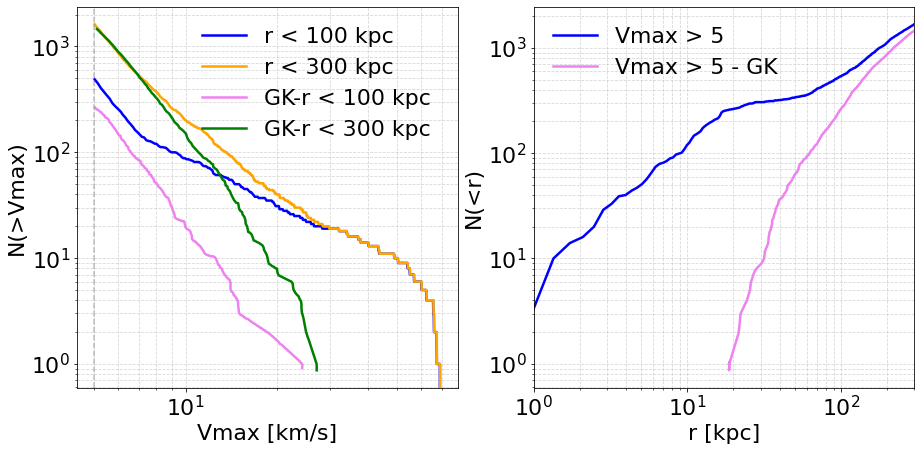

In [526]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))


pos = location100[1:]

values, base = np.histogram(Vmax[pos], bins=np.size(pos))
cumulative = np.cumsum(values)
ax[0].plot(base[:-1], len(Vmax[pos])-cumulative, c="blue", lw=2.5, label="r < 100 kpc")




pos = location300[1:]

values, base = np.histogram(Vmax[pos], bins=np.size(pos))
cumulative = np.cumsum(values)
ax[0].plot(base[:-1], len(Vmax[pos])-cumulative, c="orange", lw=2.5, label="r < 300 kpc")

data = np.genfromtxt("/scratch-persistent/gaia/m12f/rockstar/figure2b_Garrison-kimmel+17_100.dat", unpack=True)
ax[0].plot(data[0], data[1], color="violet", lw=2.5,label="GK-r < 100 kpc ")
# ax[0].plot(data[0], data[1], color="blue", lw=2.5, ls=":")
data = np.genfromtxt("/scratch-persistent/gaia/m12f/rockstar/figure2b_Garrison-kimmel+17_300.dat", unpack=True)
ax[0].plot(data[0], data[1], color="green", lw=2.5, label="GK-r < 300 kpc ")
# ax[0].plot(data[0], data[1], color="orange", lw=2.5, ls=":")

ax[0].axvline(5, ls="--", color="grey", alpha=0.5)
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].set_xlabel("Vmax [km/s]")
ax[0].set_ylabel("N(>Vmax)")
ax[0].legend(frameon=False)
ax[0].grid(which="both", ls="--", alpha=0.5)



pos = location300[1:]

values, base = np.histogram(r_halos[pos], bins=800)
cumulative = np.cumsum(values)
ax[1].plot(base[:-1], cumulative, c="blue", lw=2.5, label="Vmax > 5")

data = np.genfromtxt("/scratch-persistent/gaia/m12f/rockstar/figure2d_Garrison-kimmel+17.dat", unpack=True)
ax[1].plot(data[0], data[1], color="violet", lw=2.5, label="Vmax > 5 - GK")
# ax[1].plot(data[0], data[1], color="blue", lw=2.5, ls=":")

ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_xlabel("r [kpc]")
ax[1].set_ylabel("N(<r)") 
ax[1].legend(frameon=False)
ax[1].set_xlim([1, 300])
ax[1].grid(which="both", ls="--", alpha=0.5)

Text(0, 0.5, 'N')

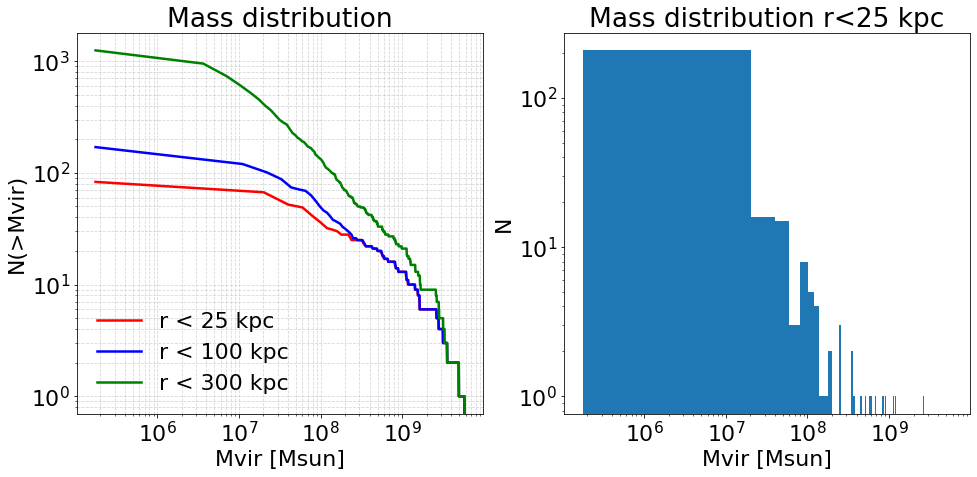

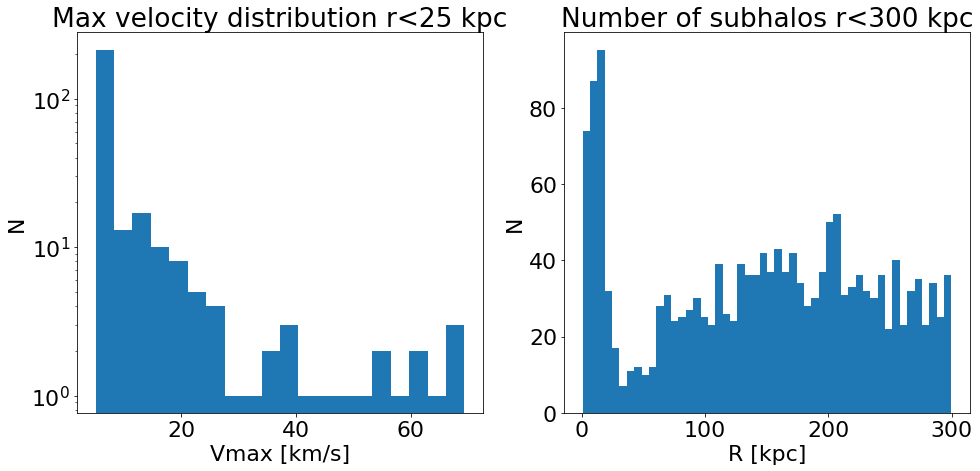

In [539]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
fig,ax1 = plt.subplots(1, 2, figsize=(16, 7))
pos = location25[1:]
values, base = np.histogram(Mvir[pos], bins=len(pos))
cumulative = np.cumsum(values)
ax[0].plot(base[:-1], len(Mvir[pos])-cumulative, c="red", lw=2.5, label="r < 25 kpc")
ax[1].hist(Mvir[pos],bins = len(pos),  lw=2.5)
ax1[0].hist(Vmax[pos], bins = 20, lw=2.5)


pos = location100[1:]

values, base = np.histogram(Mvir[pos], bins=len(pos))
cumulative = np.cumsum(values)
ax[0].plot(base[:-1], len(Mvir[pos])-cumulative, c="blue", lw=2.5, label="r < 100 kpc")
# ax[1].hist(Mvir[pos],bins = 15,  lw=2.5, label="r < 100 kpc")

pos = location300[1:]
values, base = np.histogram(Mvir[pos], bins=len(pos))
cumulative = np.cumsum(values)
ax[0].plot(base[:-1], len(Mvir[pos])-cumulative, c="green", lw=2.5, label="r < 300 kpc")
ax1[1].hist(r_halos[pos], bins = 50, lw=2.5)
# ax[1].hist(Mvir[pos],bins = 20,  lw=2.5, label="r < 300 kpc")


# ax.axvline(5, ls="--", color="grey", alpha=0.5)
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].set_xlabel("Mvir [Msun]")
ax[0].set_ylabel("N(>Mvir)")
ax[0].legend(frameon=False)
ax[0].grid(which="both", ls="--", alpha=0.5)
ax[0].set_title('Mass distribution')
ax[1].set_title('Mass distribution r<25 kpc')
ax[1].set_xlabel("Mvir [Msun]")
ax[1].set_ylabel("N")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax1[0].set_title("Max velocity distribution r<25 kpc")
ax1[0].set_xlabel("Vmax [km/s]")
ax1[0].set_ylabel("N")
ax1[0].set_yscale("log")
ax1[1].set_title("Number of subhalos r<300 kpc")
ax1[1].set_xlabel("R [kpc]")
ax1[1].set_ylabel("N")

In [532]:
pos = location300[1:]
Fbound = np.sum(Mvir[pos])/Mvir[0]
Fbound

0.07632698091422804

Text(0, 0.5, 'Mvir  [Msun]')

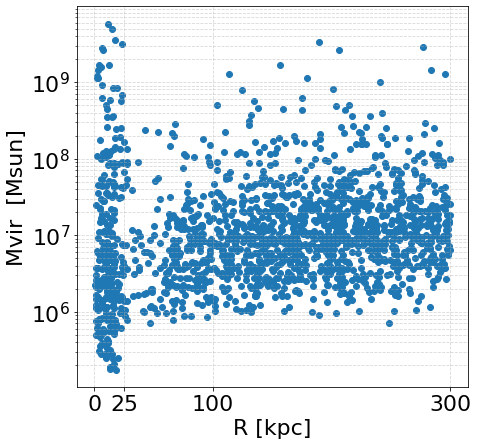

In [536]:
fig,ax = plt.subplots(1, 1, figsize=(7, 7))
pos = location300[1:]
ax.scatter(r_halos[pos], Mvir[pos])
ax.set_yscale("log")
ax.set_xticks([0,25,100,300])
# ax.set_yticks([10**5,10**6,10**7,10**8,10**9,10**10])
ax.grid(which="both", ls="--", alpha=0.5)
ax.set_xlabel("R [kpc]")
ax.set_ylabel("Mvir  [Msun]")